In [84]:
import copy

In [1]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

class BetaThompson:
    def __init__(self, num_bandits, prior_a, prior_b):
        self.num_bandits = num_bandits
        self.a = prior_a
        self.b = prior_b

    def learn(self, bandit, success):
        if success:
            self.a[bandit]+=1
        else:
            self.b[bandit]+=1

    def suggest(self):
        sampled_prob = []
        for i in range(self.num_bandits):
            dist = stats.beta(self.a[i], self.b[i])
            prob=dist.rvs()
            sampled_prob+=[prob]
        return sampled_prob.index(max(sampled_prob))

class Gamble:
    def __init__(self, num_bandits, binom_mean):
        self.num_bandits=num_bandits
        self.binom_mean=binom_mean

    def gamble(self, bandit_no):
        dist=stats.binom(n=1,p=self.binom_mean[bandit_no])
        success = True if dist.rvs()>0.5 else False
        return success

def main():
    g = Gamble(2, [0.40, 0.25])
    bot = BetaThompson(2, [1,1], [1,1])
    choice=[]
    for i in range(5000):
        suggestion = bot.suggest()
        result = g.gamble(suggestion)
        bot.learn(suggestion, result)
        choice+=[suggestion]

    plt.figure(figsize=(12,5))
    plt.plot(choice, 'b.')
    plt.ylim([-0.5,1.5])
    plt.title('Choice made (Bandit 0-0.40 prob and bandit 1-0.25 prob)')
    plt.xlabel('Draw #')
    plt.ylabel('Bandit (0 or 1)')
    plt.savefig('choice.png')


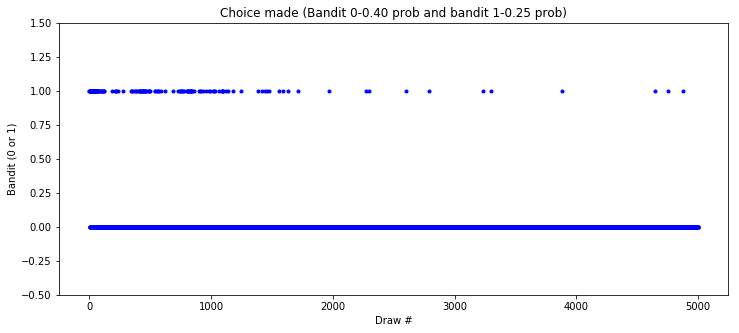

In [2]:
main()

Below is how above problem would be solved by Q learning. In this problem action is not depenent on state, actually there is no state. So Q learning and value iteration is same.

In [67]:
class Q:
    def __init__(self, no_of_arm):
        self.q = [0] * no_of_arm
    
    def learn(self, arm, success):
        if success:
            self.q[arm] += 1
    
    def suggest(self):
        # Return arm
        epsilon = np.random.rand()
        if epsilon < 0.01:
            arm = np.random.randint(0, len(self.q))
        else:
            arm = np.argmax(self.q)
        return arm # arm can be 0, 1, 2, . . . , no_of_arm - 1

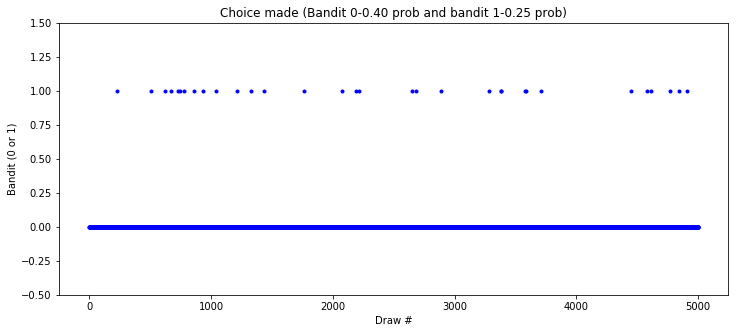

In [68]:
g = Gamble(2, [0.40, 0.25])
bot = Q(2)
choice=[]
for i in range(5000):
    suggestion = bot.suggest()
    result = g.gamble(suggestion)
    bot.learn(suggestion, result)
    choice+=[suggestion]

plt.figure(figsize=(12,5))
plt.plot(choice, 'b.')
plt.ylim([-0.5,1.5])
plt.title('Choice made (Bandit 0-0.40 prob and bandit 1-0.25 prob)')
plt.xlabel('Draw #')
plt.ylabel('Bandit (0 or 1)')
plt.savefig('choice.png')

Reward of both +1 and -1 is not helping because probability of observing sucess is less than 0.5 in both arms.